# 개요

- pycaret
  - 기계 학습 워크플로를 자동화하는 Python의 오픈 소스, 낮은 코드 기계 학습 라이브러리입니다.
  - autoML 계열 제품군들중 하나임

## 설치

- **sklearn 하위버전으로 다운그레이드 설치**

In [1]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=17d8e185895994b1369060a881a5d50836eeb69e0fae214ca7ff0b57aff92d87
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


- **런타임 재가동**

In [1]:
# 버전확인
import sklearn
sklearn.__version__

'0.23.2'

- **캐럿 설치**

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

- **런타임 재가동**

In [52]:
# catboost는 별도 설치
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.0 MB/s eta 0:00:00


In [55]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


'0.90'

In [3]:
import xgboost
xgboost.__version__

'1.7.3'

## 캐럿 분류 모듈 가져오기

In [2]:
# 최종 버전 및 모듈 가져오기 확인
import sklearn
from pycaret.classification import *

sklearn.__version__, pycaret.__version__

('0.23.2', '2.3.10')

# 분류 문제

## 데이터 준비

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
def check_shape( *dfs ):
  try:
    for df in dfs:
      print( f'{df.shape} ', end=' ')
  except Exception as e:
    print( e )

In [6]:
cancer = load_breast_cancer()
check_shape(cancer.data)

(569, 30)  

In [14]:
from sklearn.model_selection import train_test_split

cancer_df = pd.DataFrame( cancer.data, columns=cancer.feature_names )
cancer_df[ cancer.target_names[0] ] = cancer.target

cancer_df.head(1)

X_train, X_test, y_train, y_test = train_test_split( cancer_df.iloc[:, :-1], cancer_df.iloc[:, -1:], test_size=0.1, random_state=0)
check_shape( X_train, X_test, y_train, y_test )

(512, 30)  (57, 30)  (512, 1)  (57, 1)  

In [19]:
X = pd.concat( [X_train, y_train], axis=1 )
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
473,12.270,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,...,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.00000,0.2409,0.06743,1
102,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,...,32.84,84.58,547.8,0.11230,0.08862,0.1145,0.07431,0.2694,0.06878,1
272,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,28.18,195.90,2384.0,0.12720,0.47250,0.5807,0.18410,0.2833,0.08858,0
196,13.770,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,0.1834,0.06877,...,34.01,111.60,806.9,0.17370,0.31220,0.3809,0.16730,0.3080,0.09333,0
75,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,24.56,128.80,1223.0,0.15000,0.20450,0.2829,0.15200,0.2650,0.06387,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750,0
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136,1
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559,1


## Setup

- 데이터에 대한 추가적인 engineering

data : 사용할 데이터를 입력해 줍니다.

target : data에서 어떤 데이터를 target으로 할 지 입력합니다. 우리는 투표이기 때문에 "voted"를 입력할 예정입니다.

train_size : train_test_split과 동일하다고 생각하시면 됩니다. train_size만큼 학습하고, 나머지는 validation data로 사용합니다.

sample_estimator : 어떤 모델로 예측해 볼 것인지를 입력합니다. 입력하지 않으면 Logistic Regression Model이 자동으로 사용됩니다. 이 sample_estimator를 통해서 다양한 것들을 예측하는데, 대표적으로 train_size를 몇으로 사용할지를 정할 수 있습니다.

categorical_features : 범주형 변수를 여기에 입력할 수 있습니다.

silent : True로 설정하면, 입력된 데이터의 형태에 따라서 알아서 데이터를 조정합니다.

remove_perfect_collinearity : True로 설정하면 상관관계가 1인 피쳐를 삭제합니다.

fix_imbalance : True로 설정하면 SMOTE를 적용합니다. SMOTE는 클래스가 적은 데이터의 표본을 임의의 값으로 변형해 데이터를 추가하는 방법입니다.

fix_imbalance_method : imblearn에서 제공하는 다양한 모듈을 적용할 수 있습니다.

data_split_shuffle : False로 설정하면 데이터 split을 할 때 shuffle하는 것을 막습니다.

folds_shuffle : False로 설정하면 cross-validation을 할 때 shuffle하는 것을 막습니다.

n_jobs : 몇개의 processor를 이용할지 입력할 수 있습니다.

log_experiment : True로 설정하면 로그를 MLFlow 서버에 기록합니다.

experiment_name : 로그를 기록할 때 사용할 이름입니다.

log_plots : True로 설정하면 MLFlow에 정확한 plot이 기록됩니다.

log_profile : True로 설정하면 html파일이 MLFlow에 저장됩니다.

log_data : True로 설정하면 train, test 데이터가 csv파일로 저장됩니다.

verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [20]:
%%time

target_name = cancer.target_names[0] # malignant
clf = setup(  data = X,               # 데이터
              target=target_name,     # 정답 피처명
              silent=True,            # 데이터 조정은 알아서
              verbose=True,           # 로그출력
              train_size = 0.9,       # 훈련 데이터 비율
              data_split_shuffle=False,   # 스플릿 할때 섞는 여부
              normalize = True,       # 정규화 할것인지
              session_id=100          # 난수시드
            )

,Description,Value
0,session_id,100
1,Target,malignant
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(512, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='malignant',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('du

CPU times: user 1.11 s, sys: 54.9 ms, total: 1.17 s
Wall time: 1.7 s


## 자동으로 최적 모델 구하기

### 후보모델

- 체크 가능한 모델 리스트

In [21]:
# catboost 별도 설치, xgboost 업그레이드
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### 최적 모델 자동으로찾기 (후보수 지정)

- **데이터에 적합한 모델 찾기**

In [22]:
%%time

'''
  fold : 폴드 지정
  n_select : n_select는 몇개의 Top 모델을 가져올것인지의 개수

  or
  create_model() 로 지정할수도 있음
'''
top5_models = compare_models(fold=5, round=3, sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.976,0.992,0.986,0.977,0.981,0.948,0.949,0.824
catboost,CatBoost Classifier,0.974,0.994,0.993,0.967,0.980,0.943,0.944,10.710
et,Extra Trees Classifier,0.967,0.993,0.979,0.970,0.974,0.929,0.930,0.188
rf,Random Forest Classifier,0.965,0.990,0.983,0.964,0.973,0.924,0.925,0.428
knn,K Neighbors Classifier,0.963,0.990,0.983,0.960,0.971,0.919,0.920,0.050
qda,Quadratic Discriminant Analysis,0.959,0.988,0.969,0.966,0.967,0.911,0.911,0.026
gbc,Gradient Boosting Classifier,0.957,0.990,0.976,0.957,0.966,0.905,0.906,0.526
ada,Ada Boost Classifier,0.954,0.988,0.973,0.957,0.964,0.901,0.902,0.264
svm,SVM - Linear Kernel,0.952,0.000,0.962,0.963,0.962,0.897,0.898,0.026
lightgbm,Light Gradient Boosting Machine,0.950,0.990,0.976,0.948,0.961,0.890,0.893,0.266


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), <catboost.core.CatBoostClassifier object at 0x7f996fc76d30>, ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=100, verbose=0,
      

CPU times: user 22.3 s, sys: 2.26 s, total: 24.6 s
Wall time: 1min 29s


In [24]:
# 탑 5개 모델 확인
top5_models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=100, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None

### 블랜딩

- 앙상블 보팅 작업 진행

In [25]:
# 폴드수를 늘려서 진행
blended = blend_models(estimator_list = top5_models,
                       fold     = 10,
                       method   = 'soft',     # hard(다수결), soft(합산평균)
                       optimize ='Accuracy',  # 지표
                       )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9783,1.0000,1.0000,0.9677,0.9836,0.9514,0.9525
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9783,1.0000,1.0000,0.9667,0.9831,0.9528,0.9538
4,0.9565,0.9858,0.9655,0.9655,0.9655,0.9067,0.9067
5,0.9348,0.9797,1.0000,0.9062,0.9508,0.8547,0.8639
6,0.9783,0.9919,1.0000,0.9667,0.9831,0.9528,0.9538
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9565,0.9959,0.9655,0.9655,0.9655,0.9067,0.9067


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=100,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7f996fc972e0>),
                             ('et',
     

### 최종 모델 추출

In [26]:
model = finalize_model(blended)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=100,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7f996fc972e0>),
                             ('et',
                              Ex...
         

In [60]:
# 최종 모델
model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=130, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

### 예측

In [43]:
y_pred = predict_model(model, data = X_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=100,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7f99650ecaf0>),
                             ('et',
                              Ex...
           

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test.malignant, y_pred.Label )

0.9649122807017544

## 직접 모델을 생성해서 최적모델찾기

- create_model(estimator = None, ensemble = False, method = None, fold = 10, round = 4, cross_validation = True, verbose = True, system = True, **kwargs)


```
estimator : 모델
ensemble : estimator를 앙상블 한 결과를 나타냅니다.
method : bagging, boosting 선택
fold : K-fold의 수로, 최소 2 이상의 숫자를 입력
round : 점수 반올림으로 표시할 자리
cross_validation : True로 설정하면 cross_validation을 사용
verbose : True로 설정하면 로그출력
system : internal function으로 인해 바뀌는 것을 제외하고는 항상 True
```



In [45]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### 직접생성

In [47]:
# 모델명은 ID를 사용
model_gbc       = create_model('gbc', fold = 5)
model_catboost  = create_model('catboost', fold = 5)
model_lightgbm  = create_model('lightgbm', fold = 5)
model_lda       = create_model('lda', fold = 5)
model_lr        = create_model('lr', fold = 5)
model_xgb       = create_model('xgboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9348,0.9908,0.9661,0.9344,0.9500,0.8563,0.8573
1,0.9674,0.9985,0.9661,0.9828,0.9744,0.9296,0.9298
2,0.9130,0.9650,0.9828,0.8906,0.9344,0.8063,0.8150
3,0.9783,0.9924,0.9828,0.9828,0.9828,0.9533,0.9533
4,0.9457,0.9965,0.9483,0.9649,0.9565,0.8841,0.8843
Mean,0.9478,0.9886,0.9692,0.9511,0.9596,0.8859,0.8880
Std,0.0232,0.0121,0.0128,0.0350,0.0173,0.0523,0.0496


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 9
INFO:logs:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)
INFO:logs:create_model() succesfully completed......................................


### Tune Models (튜닝)

- tune_model(estimator = None, fold = 10, round = 4, n_iter = 10, custom_grid = None, optimize = ‘Accuracy’, choose_better = False, verbose = True)



```
estimator : 사용할 모델을 입력
fold : K-fold의 수로, 최소 2 이상의 숫자
round : 점수 반올림으로 표시할 자리
n_iter : Random Grid Search를 한 회차당 반복할 회수
custom_grid : 직접 파라미터의 범위를 조정
optimize : 파라미터 튜닝 과정에서 어떤 점수를 따라갈 것인지 선택 가능. 'Accuracy','AUC','Recall','Precision', 'F1'
choose_better : True로 설정하면 성능이 높아지지 않을 경우 tuning을 하지 않은 모델을 반환
verbose : True로 설정하면 로그 출력
```




In [48]:
tune_model_gbc      = tune_model(model_gbc,       fold=5, optimize = 'AUC', choose_better = True)
tune_model_catboost = tune_model(model_catboost,  fold=5, optimize = 'AUC', choose_better = True)
tune_model_lightgbm = tune_model(model_lightgbm,  fold=5, optimize = 'AUC', choose_better = True)
tune_model_lda      = tune_model(model_lda,       fold=5, optimize = 'AUC', choose_better = True)
tune_model_lr       = tune_model(model_lr,        fold=5, optimize = 'AUC', choose_better = True)
tune_model_xgb      = tune_model(model_xgb,       fold=5, optimize = 'AUC', choose_better = True)

cadidate_models = [ tune_model_gbc, tune_model_catboost, tune_model_lightgbm, tune_model_lda, tune_model_lr, tune_model_xgb ]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9990,1.0000,0.9365,0.9672,0.9029,0.9072
1,0.9783,0.9949,1.0000,0.9672,0.9833,0.9521,0.9532
2,0.9130,0.9792,0.9828,0.8906,0.9344,0.8063,0.8150
3,0.9891,0.9970,1.0000,0.9831,0.9915,0.9765,0.9768
4,0.9674,0.9954,0.9828,0.9661,0.9744,0.9296,0.9298
Mean,0.9609,0.9931,0.9931,0.9487,0.9702,0.9135,0.9164
Std,0.0263,0.0071,0.0084,0.0327,0.0196,0.0589,0.0558


INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 15
INFO:logs:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=130, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)
INFO:logs:tune_model() succesfully completed......................................


### 검증데이터로 예측

- predict_model(estimator, data=None, probability_threshold=None, platform=None, authentication=None, verbose=True)



```
- setup environment에서 train_size = 0.9, 여기서는 0.1을 가지고 검증
estimator : 사용할 모델
data : 다른 데이터를 직접 입력다. 단 SETUP과 같은 형태여야만함
probability_threshold : default는 0.5로 지정
platform : cloud에서 모델을 불러올 수 있음
authentication : 인증된 토큰을 입력
(플랫폼이 aws면 {‘bucket’ : ‘Name of Bucket on S3’}의 형태
verbose : True로 설정하면 로그출력
```



In [82]:
for tune_model in cadidate_models:
  display(predict_model(tune_model))

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=10,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=270, n_iter_no_change=None,
                           presort='deprecated', random_state=100,
                           subsample=0.3, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Pr

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9615,0.9985,0.9667,0.9667,0.9667,0.9212,0.9212


,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,Label,Score
0,1.067804,-0.015094,-0.160340,2.506804,1.387665,0.837099,1.093591,1.606292,1.633353,0.541171,...,0.468601,3.958081,1.787010,0.947599,1.313859,2.447404,1.489331,0,0,0.8397
1,-0.806101,-0.612281,-0.593006,0.034559,-0.613319,-0.572638,-0.770843,0.979199,-0.433373,-0.628816,...,-0.544513,0.207337,-0.334827,-0.201571,-0.579152,0.758178,-0.239586,1,1,0.9017
2,-0.995805,-0.883692,-0.775313,-1.362643,-1.069463,-0.750134,-1.061075,-1.004165,-0.083466,-0.772942,...,-0.667797,-0.928047,-0.416894,-0.292383,-0.893594,-0.507538,0.487078,1,1,0.9000
3,0.838771,0.338068,0.204836,-0.334127,-0.005317,0.299305,0.661964,-0.340613,-0.249885,-0.331555,...,-0.089122,-0.322804,-0.338798,0.078114,0.500491,-0.562081,-0.884986,0,0,0.5768
4,1.336166,3.252472,3.424767,0.673945,3.094638,3.033916,3.457976,0.067726,0.724448,1.693143,...,2.908317,1.073233,2.360818,1.831575,2.607371,-0.884526,1.283227,0,0,0.8297
5,0.785562,0.415731,0.083858,0.192467,2.257327,2.286430,1.229988,0.840655,0.889445,-0.539084,...,-0.086005,0.392886,3.031917,3.059964,2.013628,-0.064779,1.895651,0,0,0.7711
6,0.202569,0.910322,0.915585,-0.896674,-0.697621,-0.185080,0.180877,1.161493,-1.774682,0.491974,...,0.655606,-1.140104,-0.864955,-0.210265,0.059728,3.169296,-1.307205,0,0,0.7288
7,-0.007956,0.208494,0.090299,-0.480756,-0.107507,-0.351969,-0.017217,0.250021,-0.598369,-0.418863,...,-0.125657,-0.075405,0.344876,-0.425221,0.520181,0.089225,0.083114,1,1,0.6652
8,0.568096,0.147999,0.005166,1.195605,0.620764,0.510229,0.825131,0.789613,0.690311,0.048509,...,0.178571,0.167577,1.178785,0.436052,1.042736,1.269919,1.536441,0,0,0.8290
9,0.121598,1.601113,1.733309,-1.165963,-0.347092,0.340009,0.723916,0.428669,-1.673692,0.637140,...,1.341289,-1.219625,-0.643241,-0.037818,0.423244,0.238416,-1.412023,0,0,0.7707


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostClassifier object at 0x7f99565784c0>, probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,Label,Score
0,1.067804,-0.015094,-0.160340,2.506804,1.387665,0.837099,1.093591,1.606292,1.633353,0.541171,...,0.468601,3.958081,1.787010,0.947599,1.313859,2.447404,1.489331,0,0,0.9984
1,-0.806101,-0.612281,-0.593006,0.034559,-0.613319,-0.572638,-0.770843,0.979199,-0.433373,-0.628816,...,-0.544513,0.207337,-0.334827,-0.201571,-0.579152,0.758178,-0.239586,1,1,0.9980
2,-0.995805,-0.883692,-0.775313,-1.362643,-1.069463,-0.750134,-1.061075,-1.004165,-0.083466,-0.772942,...,-0.667797,-0.928047,-0.416894,-0.292383,-0.893594,-0.507538,0.487078,1,1,0.9984
3,0.838771,0.338068,0.204836,-0.334127,-0.005317,0.299305,0.661964,-0.340613,-0.249885,-0.331555,...,-0.089122,-0.322804,-0.338798,0.078114,0.500491,-0.562081,-0.884986,0,0,0.6727
4,1.336166,3.252472,3.424767,0.673945,3.094638,3.033916,3.457976,0.067726,0.724448,1.693143,...,2.908317,1.073233,2.360818,1.831575,2.607371,-0.884526,1.283227,0,0,0.9990
5,0.785562,0.415731,0.083858,0.192467,2.257327,2.286430,1.229988,0.840655,0.889445,-0.539084,...,-0.086005,0.392886,3.031917,3.059964,2.013628,-0.064779,1.895651,0,0,0.9884
6,0.202569,0.910322,0.915585,-0.896674,-0.697621,-0.185080,0.180877,1.161493,-1.774682,0.491974,...,0.655606,-1.140104,-0.864955,-0.210265,0.059728,3.169296,-1.307205,0,0,0.9680
7,-0.007956,0.208494,0.090299,-0.480756,-0.107507,-0.351969,-0.017217,0.250021,-0.598369,-0.418863,...,-0.125657,-0.075405,0.344876,-0.425221,0.520181,0.089225,0.083114,1,1,0.8384
8,0.568096,0.147999,0.005166,1.195605,0.620764,0.510229,0.825131,0.789613,0.690311,0.048509,...,0.178571,0.167577,1.178785,0.436052,1.042736,1.269919,1.536441,0,0,0.9972
9,0.121598,1.601113,1.733309,-1.165963,-0.347092,0.340009,0.723916,0.428669,-1.673692,0.637140,...,1.341289,-1.219625,-0.643241,-0.037818,0.423244,0.238416,-1.412023,0,0,0.9813


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.7, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=31, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=30, n_jobs=-1, num_leaves=20, objective=None,
               random_state=100, reg_alpha=0.2, reg_lambda=0.3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9808,0.997,0.9667,1.0,0.9831,0.9608,0.9616


,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,Label,Score
0,1.067804,-0.015094,-0.160340,2.506804,1.387665,0.837099,1.093591,1.606292,1.633353,0.541171,...,0.468601,3.958081,1.787010,0.947599,1.313859,2.447404,1.489331,0,0,0.9996
1,-0.806101,-0.612281,-0.593006,0.034559,-0.613319,-0.572638,-0.770843,0.979199,-0.433373,-0.628816,...,-0.544513,0.207337,-0.334827,-0.201571,-0.579152,0.758178,-0.239586,1,1,0.9989
2,-0.995805,-0.883692,-0.775313,-1.362643,-1.069463,-0.750134,-1.061075,-1.004165,-0.083466,-0.772942,...,-0.667797,-0.928047,-0.416894,-0.292383,-0.893594,-0.507538,0.487078,1,1,0.9977
3,0.838771,0.338068,0.204836,-0.334127,-0.005317,0.299305,0.661964,-0.340613,-0.249885,-0.331555,...,-0.089122,-0.322804,-0.338798,0.078114,0.500491,-0.562081,-0.884986,0,0,0.6432
4,1.336166,3.252472,3.424767,0.673945,3.094638,3.033916,3.457976,0.067726,0.724448,1.693143,...,2.908317,1.073233,2.360818,1.831575,2.607371,-0.884526,1.283227,0,0,0.9998
5,0.785562,0.415731,0.083858,0.192467,2.257327,2.286430,1.229988,0.840655,0.889445,-0.539084,...,-0.086005,0.392886,3.031917,3.059964,2.013628,-0.064779,1.895651,0,0,0.9986
6,0.202569,0.910322,0.915585,-0.896674,-0.697621,-0.185080,0.180877,1.161493,-1.774682,0.491974,...,0.655606,-1.140104,-0.864955,-0.210265,0.059728,3.169296,-1.307205,0,0,0.9626
7,-0.007956,0.208494,0.090299,-0.480756,-0.107507,-0.351969,-0.017217,0.250021,-0.598369,-0.418863,...,-0.125657,-0.075405,0.344876,-0.425221,0.520181,0.089225,0.083114,1,1,0.7811
8,0.568096,0.147999,0.005166,1.195605,0.620764,0.510229,0.825131,0.789613,0.690311,0.048509,...,0.178571,0.167577,1.178785,0.436052,1.042736,1.269919,1.536441,0,0,0.9993
9,0.121598,1.601113,1.733309,-1.165963,-0.347092,0.340009,0.723916,0.428669,-1.673692,0.637140,...,1.341289,-1.219625,-0.643241,-0.037818,0.423244,0.238416,-1.412023,0,0,0.9484


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='lsqr', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9615,0.9985,1.0,0.9375,0.9677,0.9202,0.9232


,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,Label,Score
0,1.067804,-0.015094,-0.160340,2.506804,1.387665,0.837099,1.093591,1.606292,1.633353,0.541171,...,0.468601,3.958081,1.787010,0.947599,1.313859,2.447404,1.489331,0,0,1.0000
1,-0.806101,-0.612281,-0.593006,0.034559,-0.613319,-0.572638,-0.770843,0.979199,-0.433373,-0.628816,...,-0.544513,0.207337,-0.334827,-0.201571,-0.579152,0.758178,-0.239586,1,1,0.9973
2,-0.995805,-0.883692,-0.775313,-1.362643,-1.069463,-0.750134,-1.061075,-1.004165,-0.083466,-0.772942,...,-0.667797,-0.928047,-0.416894,-0.292383,-0.893594,-0.507538,0.487078,1,1,0.9999
3,0.838771,0.338068,0.204836,-0.334127,-0.005317,0.299305,0.661964,-0.340613,-0.249885,-0.331555,...,-0.089122,-0.322804,-0.338798,0.078114,0.500491,-0.562081,-0.884986,0,1,0.6053
4,1.336166,3.252472,3.424767,0.673945,3.094638,3.033916,3.457976,0.067726,0.724448,1.693143,...,2.908317,1.073233,2.360818,1.831575,2.607371,-0.884526,1.283227,0,0,1.0000
5,0.785562,0.415731,0.083858,0.192467,2.257327,2.286430,1.229988,0.840655,0.889445,-0.539084,...,-0.086005,0.392886,3.031917,3.059964,2.013628,-0.064779,1.895651,0,0,0.9824
6,0.202569,0.910322,0.915585,-0.896674,-0.697621,-0.185080,0.180877,1.161493,-1.774682,0.491974,...,0.655606,-1.140104,-0.864955,-0.210265,0.059728,3.169296,-1.307205,0,0,0.9908
7,-0.007956,0.208494,0.090299,-0.480756,-0.107507,-0.351969,-0.017217,0.250021,-0.598369,-0.418863,...,-0.125657,-0.075405,0.344876,-0.425221,0.520181,0.089225,0.083114,1,1,0.7596
8,0.568096,0.147999,0.005166,1.195605,0.620764,0.510229,0.825131,0.789613,0.690311,0.048509,...,0.178571,0.167577,1.178785,0.436052,1.042736,1.269919,1.536441,0,0,0.9915
9,0.121598,1.601113,1.733309,-1.165963,-0.347092,0.340009,0.723916,0.428669,-1.673692,0.637140,...,1.341289,-1.219625,-0.643241,-0.037818,0.423244,0.238416,-1.412023,0,0,0.9652


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.04, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9808,1.0,1.0,0.9677,0.9836,0.9604,0.9611


,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,Label,Score
0,1.067804,-0.015094,-0.160340,2.506804,1.387665,0.837099,1.093591,1.606292,1.633353,0.541171,...,0.468601,3.958081,1.787010,0.947599,1.313859,2.447404,1.489331,0,0,0.9954
1,-0.806101,-0.612281,-0.593006,0.034559,-0.613319,-0.572638,-0.770843,0.979199,-0.433373,-0.628816,...,-0.544513,0.207337,-0.334827,-0.201571,-0.579152,0.758178,-0.239586,1,1,0.9400
2,-0.995805,-0.883692,-0.775313,-1.362643,-1.069463,-0.750134,-1.061075,-1.004165,-0.083466,-0.772942,...,-0.667797,-0.928047,-0.416894,-0.292383,-0.893594,-0.507538,0.487078,1,1,0.9916
3,0.838771,0.338068,0.204836,-0.334127,-0.005317,0.299305,0.661964,-0.340613,-0.249885,-0.331555,...,-0.089122,-0.322804,-0.338798,0.078114,0.500491,-0.562081,-0.884986,0,1,0.5436
4,1.336166,3.252472,3.424767,0.673945,3.094638,3.033916,3.457976,0.067726,0.724448,1.693143,...,2.908317,1.073233,2.360818,1.831575,2.607371,-0.884526,1.283227,0,0,1.0000
5,0.785562,0.415731,0.083858,0.192467,2.257327,2.286430,1.229988,0.840655,0.889445,-0.539084,...,-0.086005,0.392886,3.031917,3.059964,2.013628,-0.064779,1.895651,0,0,0.9664
6,0.202569,0.910322,0.915585,-0.896674,-0.697621,-0.185080,0.180877,1.161493,-1.774682,0.491974,...,0.655606,-1.140104,-0.864955,-0.210265,0.059728,3.169296,-1.307205,0,0,0.8285
7,-0.007956,0.208494,0.090299,-0.480756,-0.107507,-0.351969,-0.017217,0.250021,-0.598369,-0.418863,...,-0.125657,-0.075405,0.344876,-0.425221,0.520181,0.089225,0.083114,1,1,0.6030
8,0.568096,0.147999,0.005166,1.195605,0.620764,0.510229,0.825131,0.789613,0.690311,0.048509,...,0.178571,0.167577,1.178785,0.436052,1.042736,1.269919,1.536441,0,0,0.8858
9,0.121598,1.601113,1.733309,-1.165963,-0.347092,0.340009,0.723916,0.428669,-1.673692,0.637140,...,1.341289,-1.219625,-0.643241,-0.037818,0.423244,0.238416,-1.412023,0,0,0.9462


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=130, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwa

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9615,1.0,1.0,0.9375,0.9677,0.9202,0.9232


,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,Label,Score
0,1.067804,-0.015094,-0.160340,2.506804,1.387665,0.837099,1.093591,1.606292,1.633353,0.541171,...,0.468601,3.958081,1.787010,0.947599,1.313859,2.447404,1.489331,0,0,0.9998
1,-0.806101,-0.612281,-0.593006,0.034559,-0.613319,-0.572638,-0.770843,0.979199,-0.433373,-0.628816,...,-0.544513,0.207337,-0.334827,-0.201571,-0.579152,0.758178,-0.239586,1,1,0.9997
2,-0.995805,-0.883692,-0.775313,-1.362643,-1.069463,-0.750134,-1.061075,-1.004165,-0.083466,-0.772942,...,-0.667797,-0.928047,-0.416894,-0.292383,-0.893594,-0.507538,0.487078,1,1,1.0000
3,0.838771,0.338068,0.204836,-0.334127,-0.005317,0.299305,0.661964,-0.340613,-0.249885,-0.331555,...,-0.089122,-0.322804,-0.338798,0.078114,0.500491,-0.562081,-0.884986,0,1,0.8040
4,1.336166,3.252472,3.424767,0.673945,3.094638,3.033916,3.457976,0.067726,0.724448,1.693143,...,2.908317,1.073233,2.360818,1.831575,2.607371,-0.884526,1.283227,0,0,0.9998
5,0.785562,0.415731,0.083858,0.192467,2.257327,2.286430,1.229988,0.840655,0.889445,-0.539084,...,-0.086005,0.392886,3.031917,3.059964,2.013628,-0.064779,1.895651,0,0,0.9985
6,0.202569,0.910322,0.915585,-0.896674,-0.697621,-0.185080,0.180877,1.161493,-1.774682,0.491974,...,0.655606,-1.140104,-0.864955,-0.210265,0.059728,3.169296,-1.307205,0,0,0.9957
7,-0.007956,0.208494,0.090299,-0.480756,-0.107507,-0.351969,-0.017217,0.250021,-0.598369,-0.418863,...,-0.125657,-0.075405,0.344876,-0.425221,0.520181,0.089225,0.083114,1,1,0.9458
8,0.568096,0.147999,0.005166,1.195605,0.620764,0.510229,0.825131,0.789613,0.690311,0.048509,...,0.178571,0.167577,1.178785,0.436052,1.042736,1.269919,1.536441,0,0,0.9992
9,0.121598,1.601113,1.733309,-1.165963,-0.347092,0.340009,0.723916,0.428669,-1.673692,0.637140,...,1.341289,-1.219625,-0.643241,-0.037818,0.423244,0.238416,-1.412023,0,0,0.9866


### 혹은 블랜딩도 가능 (여기서는 생략)

### 모델별 결과 시각화 (생략가능)

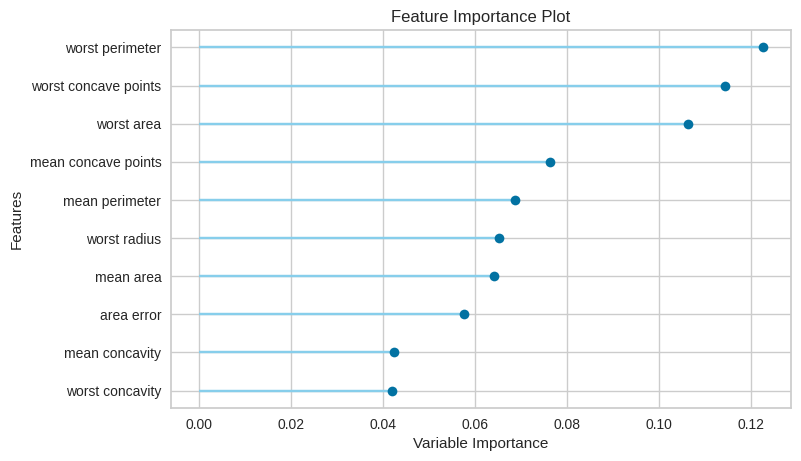

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [55]:
plot_model( tune_model_gbc, plot='feature' )

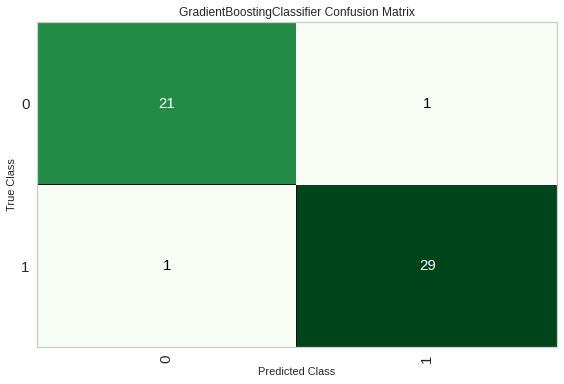

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [56]:
plot_model(tune_model_gbc, plot = 'confusion_matrix')

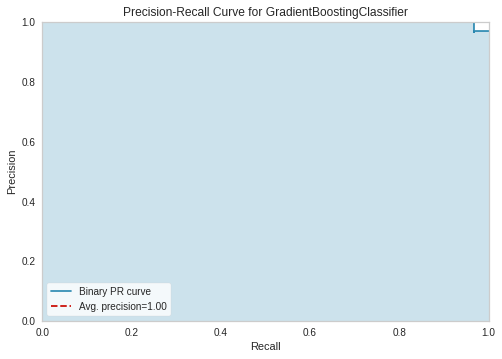

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [57]:
plot_model(tune_model_gbc, plot = 'pr')

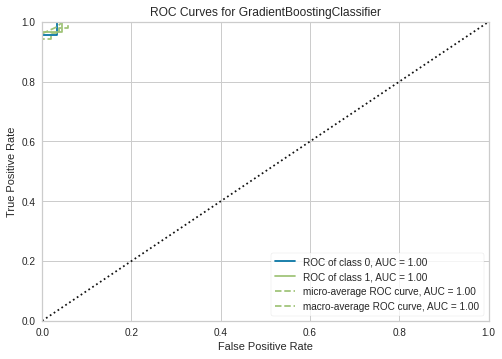

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [58]:
plot_model(tune_model_gbc, plot = 'auc')

### 모델별 테스트 데이터로 예측 성능 확인

In [70]:
for model in cadidate_models:
  y_pred = predict_model(model, data = X_test, verbose=False)
  print( model.__class__, accuracy_score(y_test.malignant, y_pred.Label) )

# <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>     0.9473684210526315
# <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>     0.9473684210526315
# <class 'lightgbm.sklearn.LGBMClassifier'>                     0.9824561403508771
# <class 'sklearn.linear_model._logistic.LogisticRegression'>   1.0
# <class 'xgboost.sklearn.XGBClassifier'>                       0.9824561403508771

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=10,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=270, n_iter_no_change=None,
                           presort='deprecated', random_state=100,
                           subsample=0.3, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:P

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> 0.9473684210526315


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.7, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=31, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=30, n_jobs=-1, num_leaves=20, objective=None,
               random_state=100, reg_alpha=0.2, reg_lambda=0.3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


<class 'catboost.core.CatBoostClassifier'> 0.9649122807017544


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='lsqr', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


<class 'lightgbm.sklearn.LGBMClassifier'> 0.9824561403508771


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.04, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'> 0.9649122807017544


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=130, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kw

<class 'sklearn.linear_model._logistic.LogisticRegression'> 1.0
<class 'xgboost.sklearn.XGBClassifier'> 0.9824561403508771


### 최종모델

In [71]:
final_model2 = finalize_model(tune_model_lr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=0.04, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=0.04, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=0.04, class_weight={}, dual=False, fit_interc

In [73]:
y_pred = predict_model(final_model2, data = X_test, verbose=False)
print( final_model2.__class__, accuracy_score(y_test.malignant, y_pred.Label) )

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.04, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


<class 'sklearn.linear_model._logistic.LogisticRegression'> 1.0


# 공통

##  저장

In [80]:
save_model(final_model2,'Pycaret_LogisticRegression_final_20230209')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=0.04, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Pycaret_LogisticRegression_final_20230209, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='malignant',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available'

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='malignant',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=0.04, class_weight={}, dual=False,
                  

## 로드

In [81]:
loaded_final_model = load_model('Pycaret_LogisticRegression_final_20230209')

y_pred = predict_model(loaded_final_model, data = X_test, verbose=False)
print( final_model2.__class__, accuracy_score(y_test.malignant, y_pred.Label) )

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Pycaret_LogisticRegression_final_20230209, platform=None, authentication=None, verbose=True)
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='malignant',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('feature_select', 'passthrough'), ('

Transformation Pipeline and Model Successfully Loaded
<class 'sklearn.linear_model._logistic.LogisticRegression'> 1.0


# 회귀문제

## 데이터 준비

In [83]:
from sklearn.datasets import load_boston

boston = load_boston()
check_shape(boston.data)

(506, 13)  

In [90]:
boston_df   = pd.DataFrame( boston.data, columns=boston.feature_names )
target_name = 'price'
boston_df[ target_name ] = boston.target

boston_df.head(1)

X_train, X_test, y_train, y_test = train_test_split( boston_df.iloc[:, :-1], boston_df.iloc[:, -1:], test_size=0.1, random_state=0)
check_shape( X_train, X_test, y_train, y_test )

(455, 13)  (51, 13)  (455, 1)  (51, 1)  

In [88]:
X = pd.concat( [X_train, y_train], axis=1 )
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60,23.1
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,378.35,11.65,24.3
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31,15.6
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,36.4
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30,19.2
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6


## setup

In [89]:
from pycaret.regression import *

In [92]:
reg = setup(  data = X,               # 데이터
              target=target_name,     # 정답 피처명
              silent=True,            # 데이터 조정은 알아서
              verbose=True,           # 로그출력
              train_size = 0.9,       # 훈련 데이터 비율
              data_split_shuffle=False,   # 스플릿 할때 섞는 여부
              normalize = True,       # 정규화 할것인지
              session_id=100          # 난수시드
            )

,Description,Value
0,session_id,100
1,Target,price
2,Original Data,"(455, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(409, 13)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                                                  target='price')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passt

## 후보모델

In [ ]:
!pip install ExtraTreesRegressor

In [93]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## 최적 모델 자동으로찾기 (후보수 지정)

In [97]:
top6_models = compare_models( fold=5, round=3, n_select = 6, errors='ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.178,11.678,3.307,0.870,0.140,0.106,0.228
catboost,CatBoost Regressor,2.182,12.173,3.370,0.865,0.146,0.107,3.626
lightgbm,Light Gradient Boosting Machine,2.365,13.480,3.607,0.842,0.151,0.116,0.046
xgboost,Extreme Gradient Boosting,2.385,13.872,3.637,0.842,0.151,0.116,0.116
gbr,Gradient Boosting Regressor,2.385,14.390,3.702,0.831,0.157,0.120,0.098
rf,Random Forest Regressor,2.445,15.346,3.799,0.822,0.158,0.122,0.324
ada,AdaBoost Regressor,2.783,16.404,3.968,0.809,0.175,0.141,0.098
knn,K Neighbors Regressor,2.742,18.634,4.164,0.796,0.172,0.126,0.018
br,Bayesian Ridge,3.439,24.343,4.883,0.716,0.282,0.172,0.028
huber,Huber Regressor,3.299,24.593,4.881,0.715,0.277,0.165,0.028


INFO:logs:create_model_container: 60
INFO:logs:master_model_container: 60
INFO:logs:display_container: 4
INFO:logs:[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=100, verbose=0, warm_start=False), <catboost.core.CatBoostRegressor object at 0x7f9956508040>, LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=100, reg_alp

In [98]:
# 탑 6
top6_models

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=100, verbose=0, warm_start=False),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=100, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 XGBRegressor(base_score=None, booster='gbtree', c

#### 브랜딩방식

##### 브랜딩

In [102]:
reg_blended = blend_models(estimator_list=top6_models, fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6989,14.3023,3.7818,0.8320,0.1708,0.1263
1,2.1422,9.5122,3.0842,0.8639,0.1483,0.1109
2,1.6786,4.7196,2.1725,0.9320,0.1121,0.0947
3,1.6899,5.0354,2.2440,0.9393,0.0978,0.0804
4,2.3199,16.5328,4.0661,0.7169,0.1497,0.1111
5,1.8254,5.4341,2.3311,0.9263,0.0997,0.0839
6,2.1351,7.8904,2.8090,0.9084,0.1712,0.1373
7,2.2460,13.7513,3.7083,0.7673,0.1899,0.1380
8,2.4304,18.8554,4.3423,0.8579,0.1432,0.0981


INFO:logs:create_model_container: 61
INFO:logs:master_model_container: 61
INFO:logs:display_container: 5
INFO:logs:VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1

##### 최종 모델 획득

In [104]:
model = finalize_model(reg_blended)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                         

In [106]:
# 최종 모델
model

VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                  

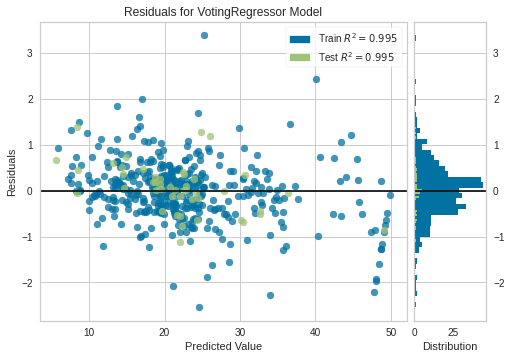

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [107]:
plot_model(model)

In [108]:
# 검증 데이터 결과
predict_model(model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                           

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.3987,0.2831,0.5321,0.9955,0.0357,0.0242


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0.0,price,Label
0,4.275773,-0.503386,1.022588,1.206675,-1.207396,1.118850,-1.076984,1.666602,1.558326,0.788872,0.437080,2.484050,1.0,5.000000,5.660133
1,0.391442,-0.503386,1.022588,1.381303,0.002609,0.510188,-0.498504,1.666602,1.558326,0.788872,0.437080,0.184574,1.0,19.500000,19.529422
2,-0.133828,-0.503386,1.239394,2.760871,-1.945443,0.964894,-1.090368,-0.523314,-0.012162,-1.776643,0.381017,2.337216,1.0,14.600000,14.667493
3,-0.422750,1.817752,-1.299291,-1.447684,0.193073,-1.319376,1.626599,-0.984349,-0.627220,-1.496769,0.413532,-0.613317,1.0,22.000000,22.404910
4,-0.398670,-0.503386,2.434759,0.473234,-1.711565,1.047243,-0.922233,-0.638573,1.827041,0.742226,-0.410564,2.357994,1.0,8.100000,8.542665
5,-0.417445,-0.503386,-1.035607,-0.391179,-0.000192,0.166474,-0.227528,-0.523314,-0.651106,-0.890374,0.423038,-0.882050,1.0,24.600000,24.448815
6,-0.415687,-0.503386,-1.205537,-0.958723,1.541725,-0.223786,-0.144948,-0.869090,-0.770534,-0.237334,0.437080,-0.895903,1.0,33.200001,32.699176
7,-0.420042,-0.503386,-0.868608,-0.347522,-0.358712,-1.126037,0.467084,-0.523314,-1.081049,0.788872,0.428871,-0.574530,1.0,20.600000,20.673246
8,0.719151,-0.503386,1.022588,1.381303,-0.182253,1.072305,-0.718222,1.666602,1.558326,0.788872,0.437080,0.758057,1.0,14.100000,14.464514
9,0.809003,-0.503386,1.022588,0.254947,0.725252,0.914769,-0.798804,1.666602,1.558326,0.788872,-2.971751,0.974153,1.0,14.100000,14.836467


##### 예측

In [115]:
y_pred = predict_model(model, data = X_test)

from sklearn.metrics import mean_squared_error
import numpy as np


print( np.sqrt( mean_squared_error(y_test.price, y_pred.Label ) ) )

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                           

4.940284036870934


### 최종 후보기준으로 신규 생성및 튜닝으로 진행

- top6_models중 1등이 ExtraTreesRegressor 이였다

In [116]:
# models()에서 이름 획득 => 'et'
model       = create_model('et')
tuned_model = tune_model(model)
tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.8070,15.1070,3.8868,0.8225,0.1828,0.1339
1,2.2828,10.4650,3.2350,0.8503,0.1593,0.1204
2,2.0261,5.9466,2.4386,0.9144,0.1277,0.1157
3,2.0302,7.3634,2.7136,0.9113,0.1161,0.0958
4,2.4778,14.6811,3.8316,0.7486,0.1559,0.1199
5,2.1798,6.9799,2.6419,0.9053,0.1128,0.0989
6,2.2561,9.3237,3.0535,0.8918,0.1793,0.1420
7,1.8109,6.2648,2.5030,0.8940,0.1397,0.1044
8,3.1292,35.2170,5.9344,0.7346,0.1877,0.1188


INFO:logs:create_model_container: 63
INFO:logs:master_model_container: 63
INFO:logs:display_container: 8
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=11, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.002,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=230, n_jobs=-1, oob_score=False,
                    random_state=100, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=11, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.002,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=230, n_jobs=-1, oob_score=False,
                    random_state=100, verbose=0, warm_start=False)

In [117]:
# 검증 데이터로 검증
predict_model(tuned_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=11, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.002,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=230, n_jobs=-1, oob_score=False,
                    random_state=100, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.7945,6.8751,2.622,0.8899,0.1776,0.1287


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0.0,price,Label
0,4.275773,-0.503386,1.022588,1.206675,-1.207396,1.118850,-1.076984,1.666602,1.558326,0.788872,0.437080,2.484050,1.0,5.000000,9.614783
1,0.391442,-0.503386,1.022588,1.381303,0.002609,0.510188,-0.498504,1.666602,1.558326,0.788872,0.437080,0.184574,1.0,19.500000,18.949348
2,-0.133828,-0.503386,1.239394,2.760871,-1.945443,0.964894,-1.090368,-0.523314,-0.012162,-1.776643,0.381017,2.337216,1.0,14.600000,15.220217
3,-0.422750,1.817752,-1.299291,-1.447684,0.193073,-1.319376,1.626599,-0.984349,-0.627220,-1.496769,0.413532,-0.613317,1.0,22.000000,24.035652
4,-0.398670,-0.503386,2.434759,0.473234,-1.711565,1.047243,-0.922233,-0.638573,1.827041,0.742226,-0.410564,2.357994,1.0,8.100000,14.836304
5,-0.417445,-0.503386,-1.035607,-0.391179,-0.000192,0.166474,-0.227528,-0.523314,-0.651106,-0.890374,0.423038,-0.882050,1.0,24.600000,24.525652
6,-0.415687,-0.503386,-1.205537,-0.958723,1.541725,-0.223786,-0.144948,-0.869090,-0.770534,-0.237334,0.437080,-0.895903,1.0,33.200001,34.631087
7,-0.420042,-0.503386,-0.868608,-0.347522,-0.358712,-1.126037,0.467084,-0.523314,-1.081049,0.788872,0.428871,-0.574530,1.0,20.600000,21.466739
8,0.719151,-0.503386,1.022588,1.381303,-0.182253,1.072305,-0.718222,1.666602,1.558326,0.788872,0.437080,0.758057,1.0,14.100000,15.210435
9,0.809003,-0.503386,1.022588,0.254947,0.725252,0.914769,-0.798804,1.666602,1.558326,0.788872,-2.971751,0.974153,1.0,14.100000,15.389565


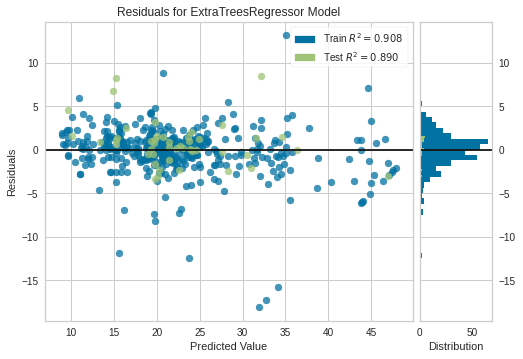

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [118]:

plot_model(tuned_model)

##### 예측

In [119]:
y_pred = predict_model(tuned_model, data = X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

print( np.sqrt( mean_squared_error(y_test.price, y_pred.Label ) ) )

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=11, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.002,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=230, n_jobs=-1, oob_score=False,
                    random_state=100, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


6.212255242867407
